# DeepRacer Log analysis|

## C. 구글 드라이브 mount **


- Colab 좌측에 폴더모양을 누르면 Colab의 현재 작업 폴더를 확인 가능.
- 아래와 같이 drive.mount('drive') 코드를 실행하면 Colab 작업 공간에 구글드라이브를 연동 가능.
- 위와 같이 코드를 실행한 후 Colab 좌측에 폴더모양을 눌러보면 'drive/MyDrive' 폴더에 구글드라이브 최상위 디렉토리가 연동되었음을 볼 수 있음.

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## D. 경로 입력 **

**[경로 입력]**  
- root_path = '위에서 생성한 deepracer 폴더 경로'

- folder_name = 'log_analysis 폴더 내에 생성한 로그분석 폴더명'

In [2]:
# deepracer 루트 경로 입력
root_path = '/content/drive/MyDrive/deepracer'

# 로그분석 폴더명 입력
folder_name = 'center'

In [3]:
import os

# 트랙 폴더
track_path = os.path.join(root_path, 'tracks')

# 로그 폴더
log_path = os.path.join(root_path, 'log_analysis', folder_name, 'training-simtrace')


print('트랙 폴더 : ', track_path)
print('로그 폴더 : ', log_path)

트랙 폴더 :  /content/drive/MyDrive/deepracer/tracks
로그 폴더 :  /content/drive/MyDrive/deepracer/log_analysis/center/training-simtrace


## E. 라이브러리

- os : OS 제어
- math : 수식 계산
- pandas : 엑셀처럼 테이블 구조의 데이터 핸들링
- numpy : 수식 및 행렬 등의 고차원 수식 처리
- matplotlib : 시각화 기능

In [4]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## F. track 선택 **

- Track 폴더 내 목록 보기

In [5]:
track_list = os.listdir(track_path)
track_list.sort()
df_track_list = pd.DataFrame({'track_name' : track_list})
df_track_list

,track_name
0,2022_april_open_ccw.npy
1,2022_april_open_cw.npy
2,2022_april_pro_ccw.npy
3,2022_april_pro_cw.npy
4,2022_august_open_ccw.npy
...,...
102,reinvent_base.npy
103,thunder_hill_open.npy
104,thunder_hill_pro.npy
105,thunder_hill_pro_ccw.npy


- 전체 Track 시각화

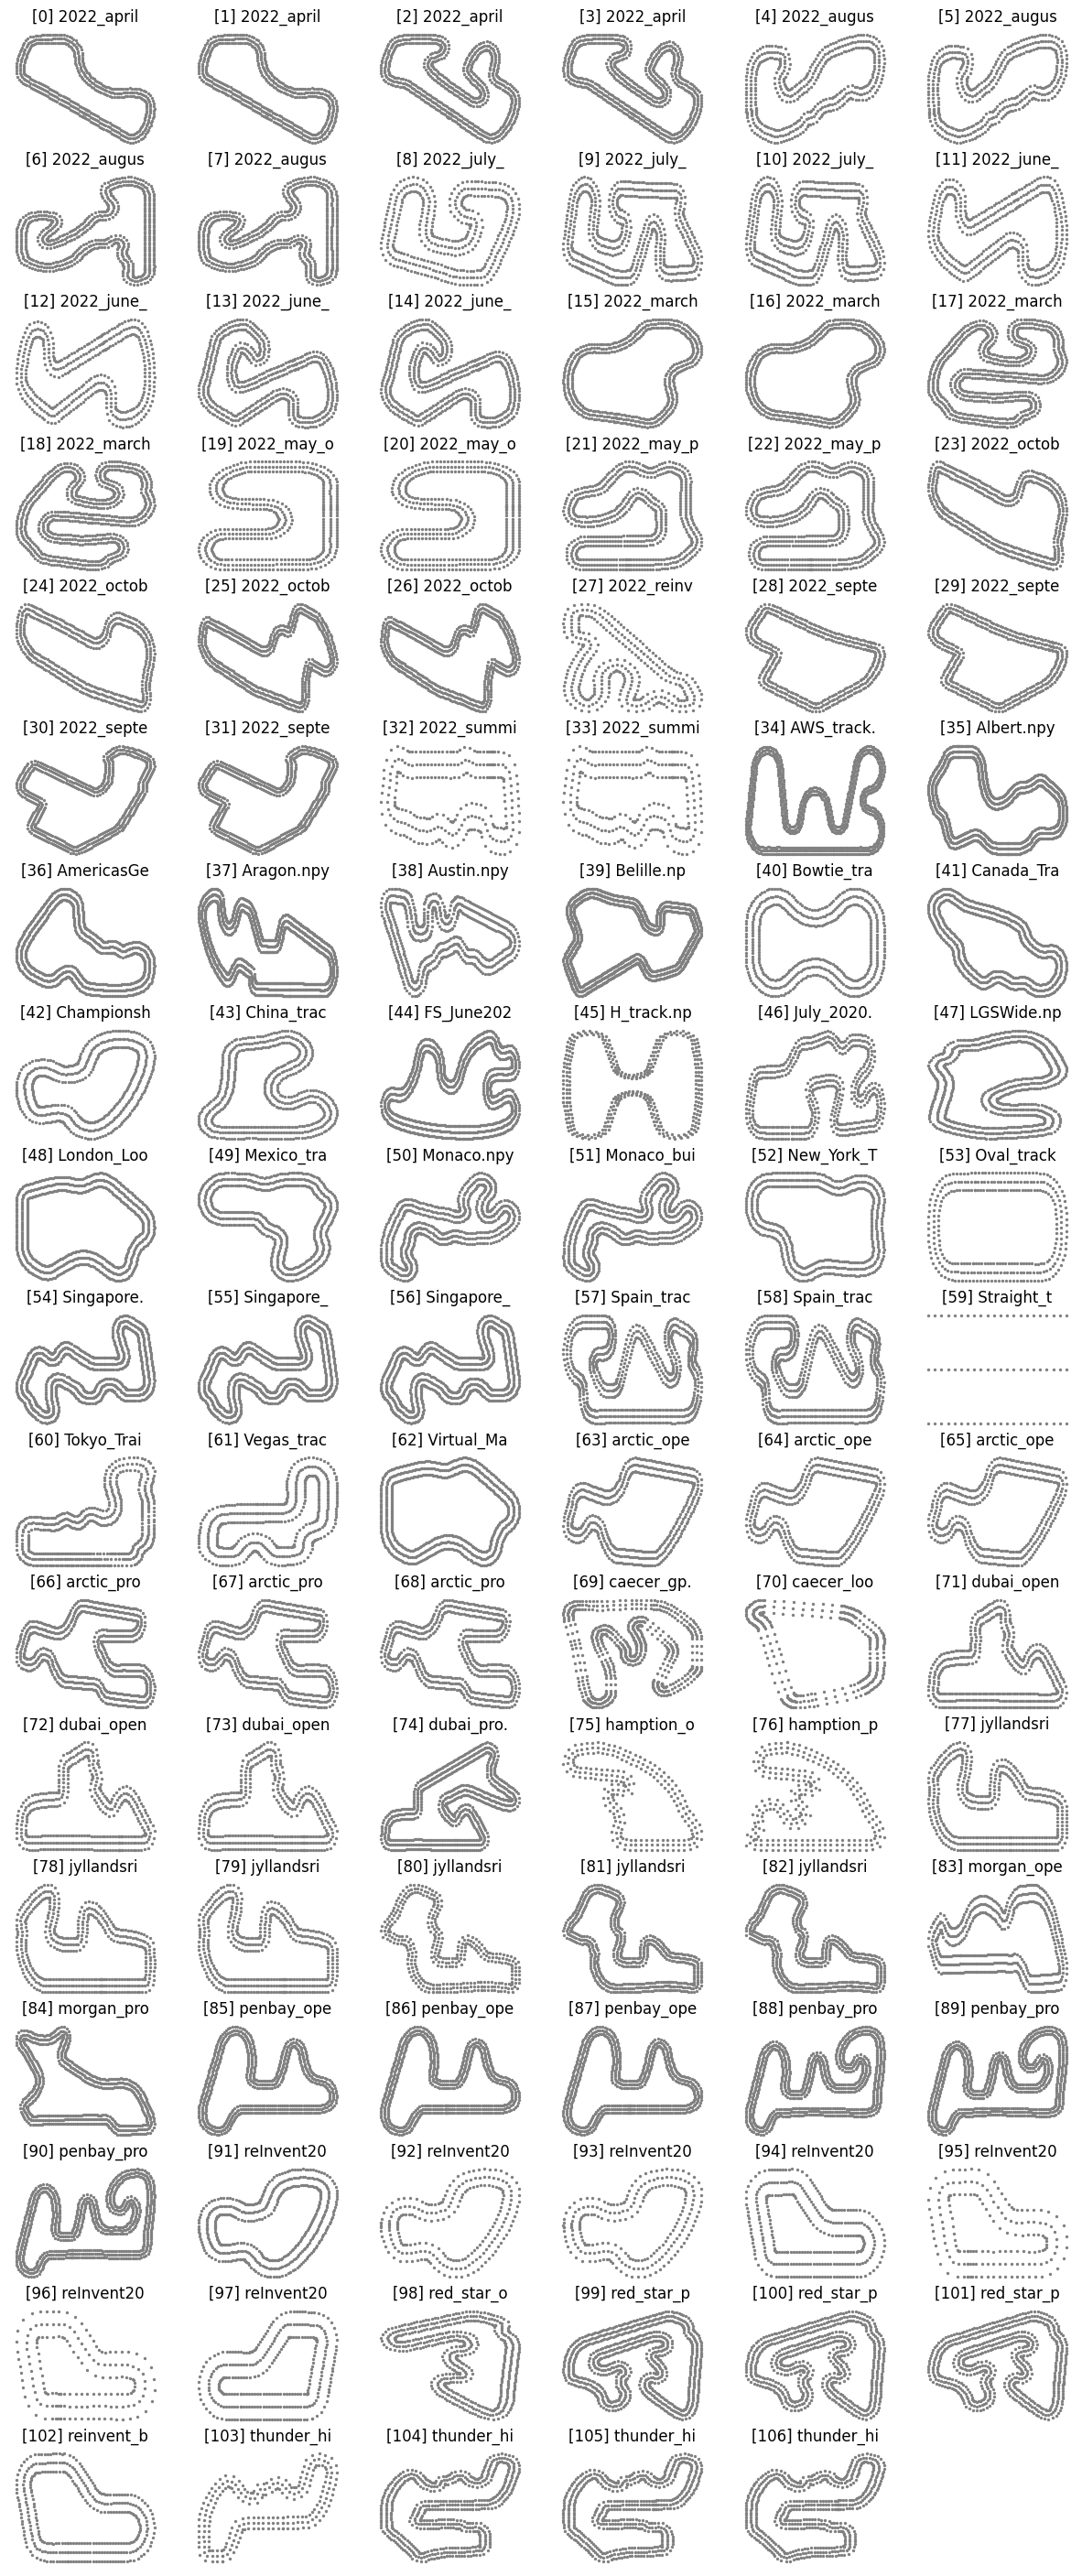

In [6]:
track_list = sorted(os.listdir(track_path))  # 트랙 리스트 정렬
c_len = 6    # 가로 개수
r_len = math.ceil(len(track_list) / c_len)  # 세로 개수

# 시각화
plt.figure(figsize = (15,2*r_len))
for i, track in enumerate(track_list) :
    plt.subplot(r_len, c_len, i+1)
    plt.title(f"[{i}] {track[:10]}")
    plt.axis('off')
    target_arr = np.load(os.path.join(track_path, track))
    target_C = target_arr[:,[0,1]]
    target_L = target_arr[:,[2,3]]
    target_R = target_arr[:,[4,5]]

    plt.scatter(target_C[:,0],target_C[:,1], c = 'gray', s = 2)
    plt.scatter(target_L[:,0],target_L[:,1], c = 'gray', s = 2)
    plt.scatter(target_R[:,0],target_R[:,1], c = 'gray', s = 2)

plt.show()

[트랙 선택]
- track_file_name = 'tracks 폴더 내에 있는 트랙 파일명'
> 원하는 트랙 선택 가능. 아래 예제에서는 The 2019 DeepRacer Championship Cup 트랙을 사용함.
이 트랙의 파일명은 'reInvent2019_track_ccw.npy'

In [9]:
# 트랙 파일명 입력
track_file_name = 'reInvent2019_track_ccw.npy'

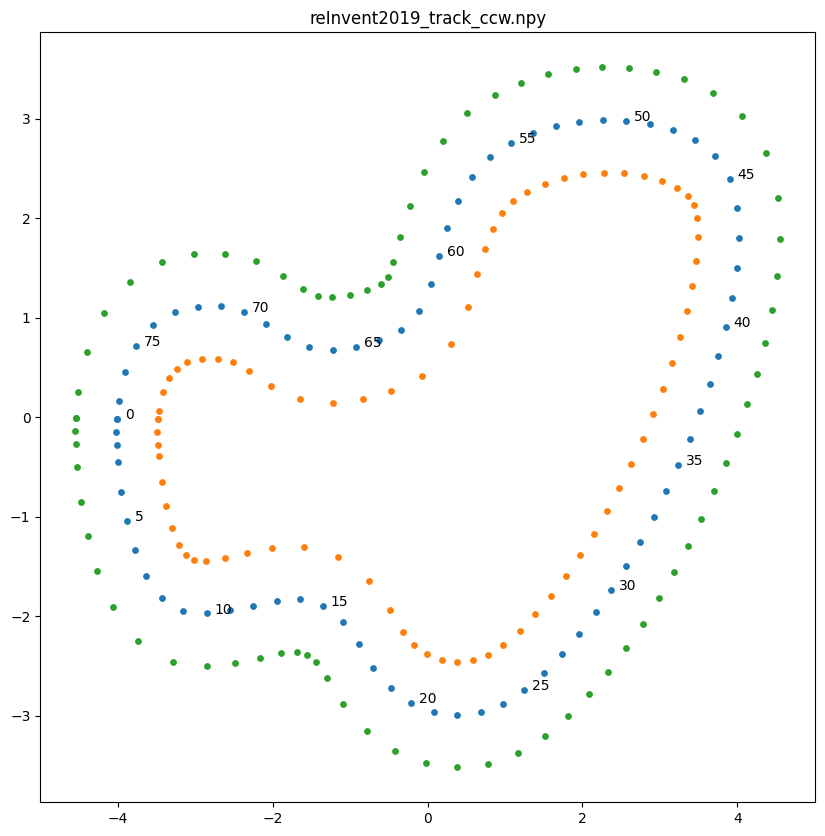

In [10]:
# 트랙 waypoint 가져오기
track_arr = np.load(os.path.join(track_path, track_file_name))
track_C = track_arr[:,[0,1]]  # 트랙 중심 좌표
track_L = track_arr[:,[2,3]]  # 트랙 좌측 좌표
track_R = track_arr[:,[4,5]]  # 트랙 우측 좌표

# 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], s = 15)
plt.scatter(track_L[:,0],track_L[:,1], s = 15)
plt.scatter(track_R[:,0],track_R[:,1], s = 15)

# index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(track_file_name)
plt.show()

# ======== 2. 로그 분석 ========

## A. 로그 파일 불러오기

- 경로 내 파일 목록 보기

In [11]:
# 폴더 내에 로그 파일 목록 가져오기
file_names = os.listdir(log_path)

# 데이터 프레임으로 변형
df_file_name = pd.DataFrame()
df_file_name['file_name'] = file_names

# 정렬
df_file_name['iter'] = pd.Series(file_names).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name = df_file_name.sort_values(by='iter').reset_index(drop = True)

print(df_file_name)

           file_name  iter
0    0-iteration.csv     0
1    1-iteration.csv     1
2    2-iteration.csv     2
3    3-iteration.csv     3
4    4-iteration.csv     4
5    5-iteration.csv     5
6    6-iteration.csv     6
7    7-iteration.csv     7
8    8-iteration.csv     8
9    9-iteration.csv     9
10  10-iteration.csv    10


- 로그 파일 불러오기

In [12]:
# 데이터 테이블로 정리하기
data_list = []
df_data = pd.DataFrame()
for i, file_name in enumerate(df_file_name['file_name']) :
    f = open(os.path.join(log_path, file_name), mode = 'r')
    text = f.read()
    f.close()

    # action 이 리스트형으로 되어 있는 경우 콤마(,)가 포함되어 있어서 제대로 읽어오지 못함. 이것을 전처리
    if '[' in text :
        text = text.replace('[','')
        text = text.replace(']','')
        text = text.replace('action', 'action_1,action_2')
        text = text.replace(' ', ',')

    # dataframe 으로 변환
    text_lines = text.split('\n')
    text_list = [text_line.split(',') for text_line in text_lines]
    df = pd.DataFrame(text_list[1:], columns = text_list[0])
    df.dropna(inplace = True)

    # 자료형 변환
    float_col = df.columns[~ df.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
    int_col = ['episode', 'steps', 'closest_waypoint']
    bool_col = ['done',	'all_wheels_on_track']
    df[float_col] = df[float_col].astype('float')
    df[int_col] = df[int_col].astype('int')
    df[bool_col] = df[bool_col].astype('bool')

    # iteration 행 삽입
    new_col = df.columns.insert(0,'iteration')
    df['iteration'] = i
    df = df[new_col]

    # 마무리
    data_list.append(df)
    df_data = pd.concat([df_data,df], axis=0)

# 인덱스 정리
df_data.reset_index(inplace = True, drop = True)

df_data

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action_2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,-4.022856,-0.154532,-95.001033,-2.465563,1.804942,-2.465563,1.804942,0.000,True,True,0.606507,1,23.090893,24.280,prepare,0.0
1,0,0,2,-4.022849,-0.154372,-95.001228,-30.000000,1.401687,-30.000000,1.401687,10.000,True,True,0.605818,1,23.090893,24.355,in_progress,0.0
2,0,0,3,-4.024541,-0.161533,-95.141714,21.040752,3.000000,21.040752,3.000000,10.000,True,True,0.636317,1,23.090893,24.413,in_progress,0.0
3,0,0,4,-4.024158,-0.194943,-93.711460,-28.352806,1.638799,-28.352806,1.638799,10.000,True,True,0.780831,1,23.090893,24.488,in_progress,0.0
4,0,0,5,-4.018806,-0.212739,-91.957966,1.033170,2.030670,1.033170,2.030670,10.000,True,True,0.859190,2,23.090893,24.550,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14238,10,219,63,-1.177373,-1.620771,20.807055,30.000000,2.804974,30.000000,2.804974,1.000,True,True,22.669241,15,23.090893,1399.508,in_progress,0.0
14239,10,219,64,-1.085273,-1.552900,27.411342,30.000000,1.909841,30.000000,1.909841,1.000,True,True,22.849771,15,23.090893,1399.580,in_progress,0.0
14240,10,219,65,-0.991905,-1.460127,36.037208,20.484583,1.000000,20.484583,1.000000,0.001,True,True,22.977412,15,23.090893,1399.644,in_progress,0.0
14241,10,219,66,-0.920367,-1.370432,43.600666,-30.000000,2.788711,-30.000000,2.788711,0.001,True,True,23.032200,15,23.090893,1399.711,in_progress,0.0


In [13]:
df_data[df_data['iteration']==1]

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action_2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
550,1,20,1,-4.022908,-0.154531,-95.022057,29.143833,1.611848,29.143833,1.611848,0.000,True,True,0.606493,1,23.090893,70.284,prepare,0.0
551,1,20,2,-4.022849,-0.154372,-95.001228,-30.000000,3.000000,-30.000000,3.000000,10.000,True,True,0.605818,1,23.090893,70.364,in_progress,0.0
552,1,20,3,-4.025704,-0.163684,-95.398975,-19.988518,2.699022,-19.988518,2.699022,10.000,True,True,0.645302,1,23.090893,70.415,in_progress,0.0
553,1,20,4,-4.035951,-0.181955,-97.468646,30.000000,1.740225,30.000000,1.740225,10.000,True,True,0.721532,1,23.090893,70.481,in_progress,0.0
554,1,20,5,-4.046421,-0.219262,-98.858486,11.687796,1.801445,11.687796,1.801445,10.000,True,True,0.879980,2,23.090893,70.549,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1,39,19,-4.519997,-0.214645,-127.158847,6.818684,1.000000,6.818684,1.000000,1.000,True,True,5.733050,1,23.090893,104.088,in_progress,0.0
1039,1,39,20,-4.591159,-0.301154,-128.094063,8.963000,1.521383,8.963000,1.521383,0.001,True,True,6.087896,2,23.090893,104.165,in_progress,0.0
1040,1,39,21,-4.667293,-0.400646,-127.733861,30.000000,1.790047,30.000000,1.790047,0.001,True,True,6.497525,2,23.090893,104.222,in_progress,0.0
1041,1,39,22,-4.720488,-0.486352,-125.491105,30.000000,1.462549,30.000000,1.462549,0.001,True,True,6.853719,3,23.090893,104.288,in_progress,0.0


**[주요 변수 설명]**
- iteration : episode의 집합.
- episode : step 의 집합
- step : episode 의 순서
- X : 차량의 x좌표
- Y : 차량의 y좌표
- yaw : 차량의 정면 각도 ( = heading)
- steer : 차량 핸들 각도
- throttle : 차량 속도 ( = speed)
- action : 행동  
> 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
- reward : 현재 step 에서 받은 보상
- all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
- progress : 현재 Epiosde 에서 완주율
- closest_waypoint : 가장 가까운 waypoint
- tstamp : 훈련이 진행된 총 시간

## B. episode 분석

- 데이터 그룹화

In [14]:
# 에피소드 별로 데이터를 그룹화
df_groupby_episode = df_data.groupby('episode')

### B1. episode vs 완주율

**[episode 에 따른 완주율]**
- 에피소드가 진행됨에 따라 완주율이 높아지는 것이 좋음.
- s 자 형태로 완주율 최대치에 도달하는 것이 가장 이상적이라 볼 수 있음.

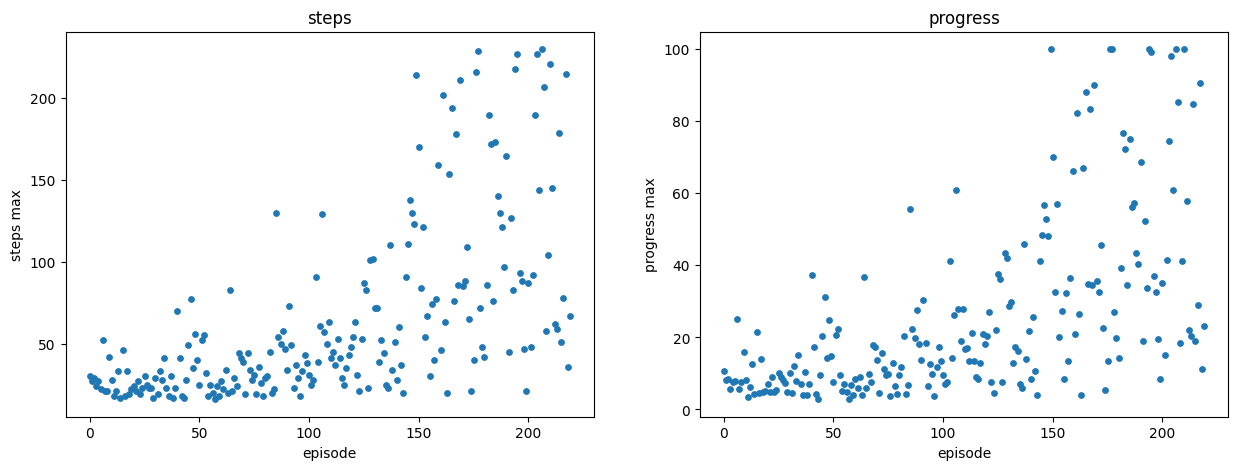

In [15]:
# 시각화
plt.figure(figsize = (15,5))

# step 계산
step_max = df_groupby_episode.max()['steps']

# step 시각화
plt.subplot(1,2,1)
plt.scatter(x = step_max.index, y = step_max, s = 15)
plt.title('steps')
plt.xlabel('episode')
plt.ylabel('steps max')

# progress 계산
progress_max = df_groupby_episode.max()['progress']

# progress 시각화
plt.subplot(1,2,2)
plt.scatter(x = progress_max.index, y = progress_max, s = 15)
plt.title('progress')
plt.xlabel('episode')
plt.ylabel('progress max')

plt.show()

### B2. episode vs reward

**[episode 에 따른 보상의 합]**
- 에피소드가 진행됨에 따라 보상의 합이 높아지는 것이 좋음.
- 완주율과 함께 S 자 형태로 수렴하는 것이 이상적이라 볼 수 있음.

<ipython-input-16-f1f387f181d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reward_sum = df_groupby_episode.sum()['reward']


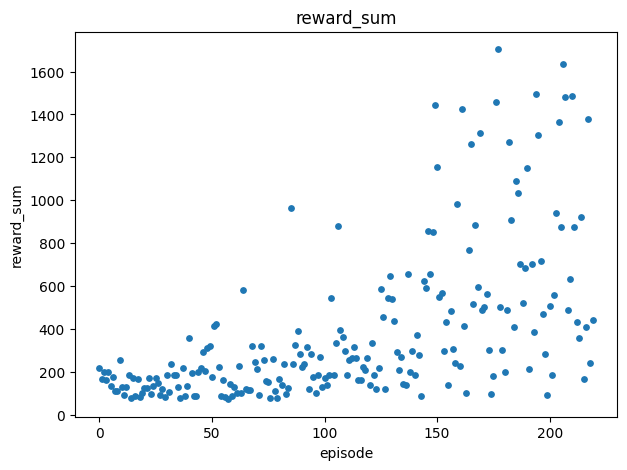

In [16]:
# reward_sum 계산
reward_sum = df_groupby_episode.sum()['reward']

# 시각화
plt.figure(figsize = (7,5))
plt.scatter(x = reward_sum.index, y = reward_sum, s = 15)
plt.title('reward_sum')
plt.xlabel('episode')
plt.ylabel('reward_sum')
plt.show()

## C. reward 기능 분석

### C1. 속도

**[속도에 따른 보상의 분포]**
- 속도가 높아질 수록 보상도 함께 증가하는 것이 이상적이라 볼 수 있음.
- 즉, / (슬래시) 형태의 증가하는 형태의 분포가 이상적임.

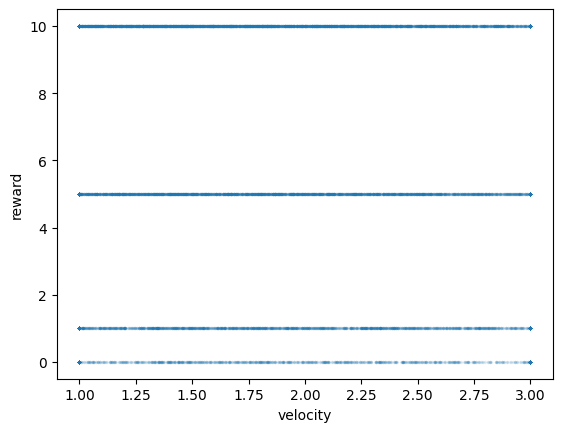

In [17]:
# 시각화
plt.scatter(x = df_data['throttle'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('velocity')
plt.ylabel('reward')
plt.show()

### C2. 조향

**[핸들 각도에 따른 보상의 분포]**
- 핸들 각도가 0에 가까울 수록 (즉, 정면을 바라볼 수록) 보상이 높아지는 것이 이상적이라 볼 수 있음.
- 즉 ㅅ(시옷) 형태의 분포가 이상적임.

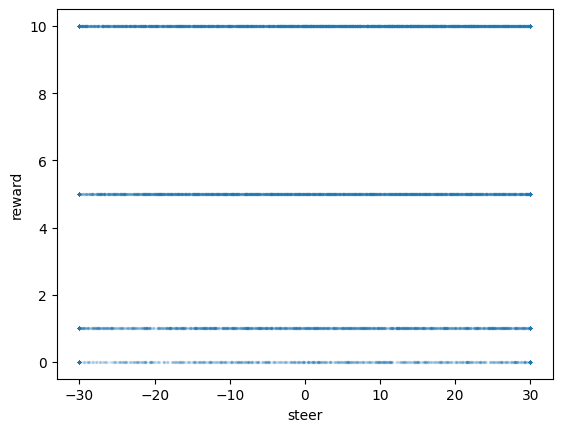

In [18]:
# 시각화
plt.scatter(x = df_data['steer'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('steer')
plt.ylabel('reward')
plt.show()

### C3. distance_from_center

**[중심으로부터 거리에 따른 보상의 분포]**
- 중심으로부터 거리가 0에 가까울 수록 보상이 높아지는 것이 이상적이라고 볼 수 있음.
- 즉, 감소하는 형태의 그래프가 이상적.

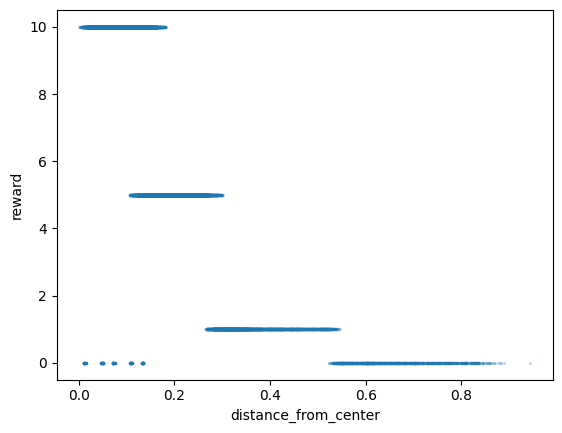

In [19]:
# waypoint 중심 좌표 가져오기
x_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,0])
y_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,1])

# 중심으로 부터의 거리 계산
distance_from_center = ((df_data['X'] - x_center)**2 + (df_data['Y'] - y_center)**2)**(1/2)

# 시각화
plt.scatter(distance_from_center, df_data['reward'], alpha = 0.2, s = 2)
plt.xlabel('distance_from_center')
plt.ylabel('reward')
plt.show()

## D. 분포 조사

### D1. 행동 분포

- 종 모양 또는 고르게 분포하는 경우가 이상적

Text(0.5, 1.0, 'throttle')

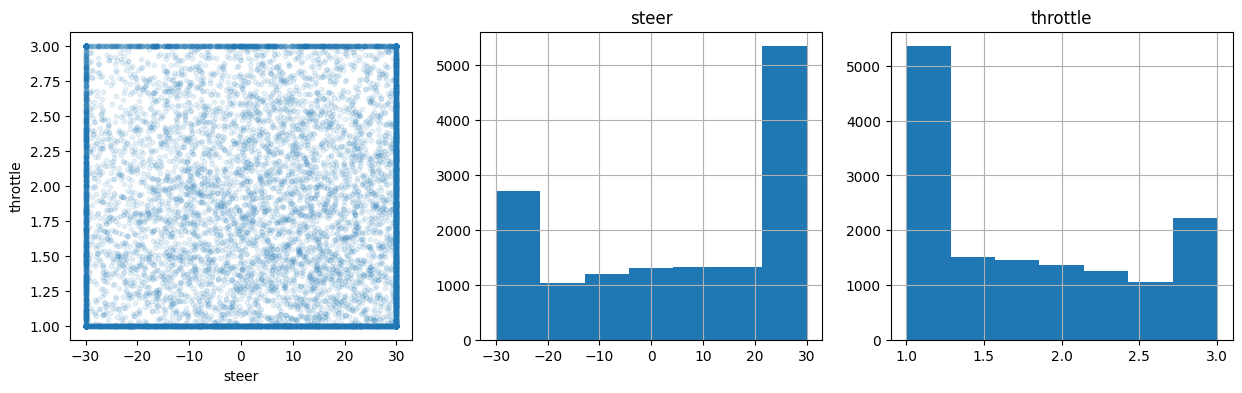

In [20]:
# 이미지 크기 지정
plt.figure(figsize = (15,4))

# 행동 분포 scatter
plt.subplot(1,3,1)
plt.scatter(x = df_data['steer'], y = df_data['throttle'], alpha = 0.1, s = 10)
plt.xlabel('steer')
plt.ylabel('throttle')

# 핸들 행동 histogram
plt.subplot(1,3,2)
df_data['steer'].hist(bins = 7)
plt.title('steer')

# 속도 행동 histogram
plt.subplot(1,3,3)
df_data['throttle'].hist(bins = 7)
plt.title('throttle')

### D2. reward 분포

- reward 분포는 종 모양을 띄는 것이 이상적

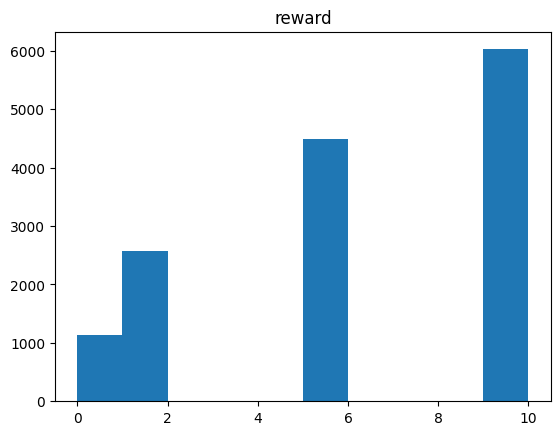

In [21]:
# 시각화
plt.hist(df_data['reward'], bins = 10)  # 10개 구간
plt.title('reward')
plt.show()

## E. 자취 시각화

### E1. 위치

**[자취 분포 시각화]**

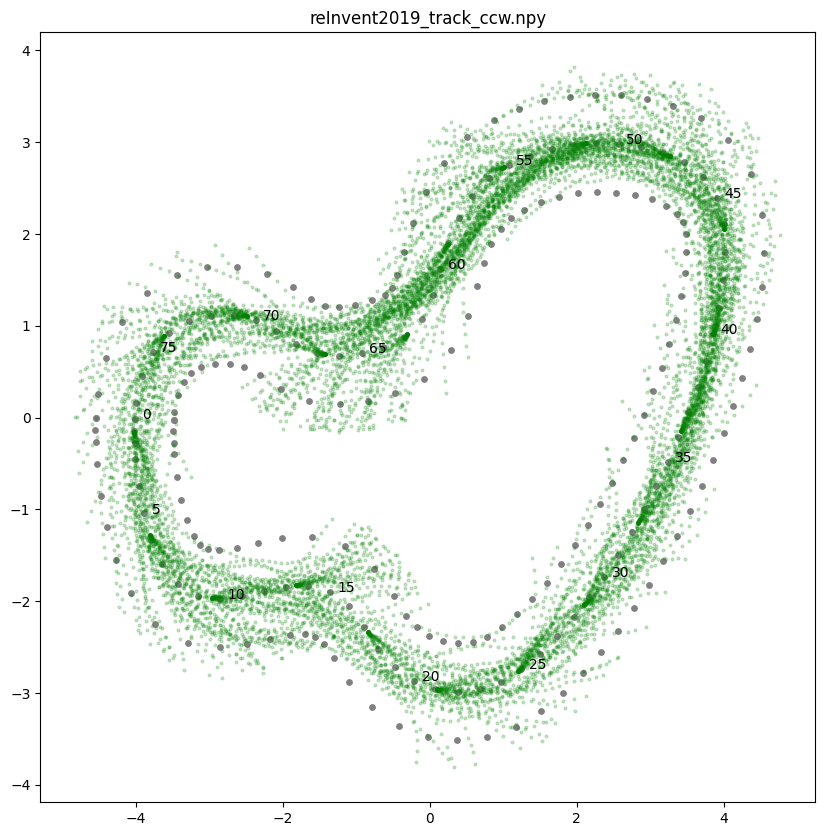

In [22]:
# 트랙 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 로그 자취 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = 'green', s = 4, alpha = 0.2)

# 출력
plt.title(track_file_name)
plt.show()

### E2. 속도

**[속도 분포 시각화]**

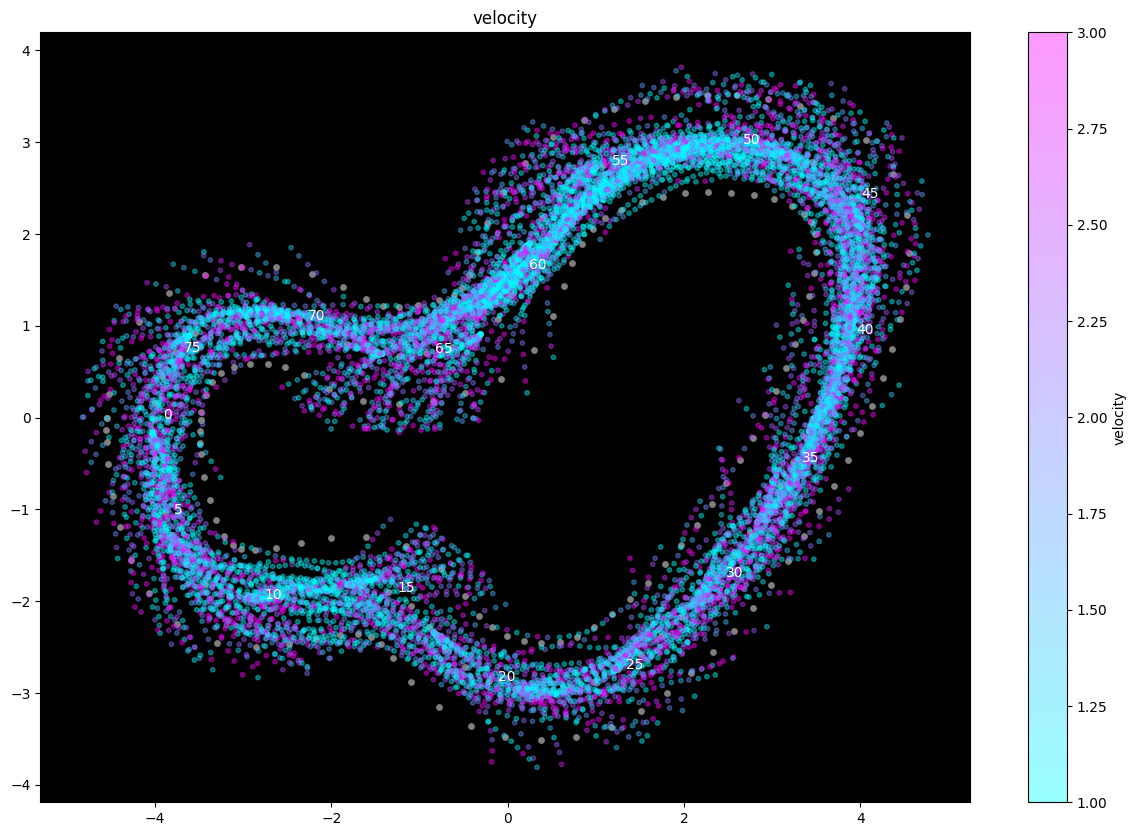

In [23]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

### E3. reward

**[reward 분포 시각화]**

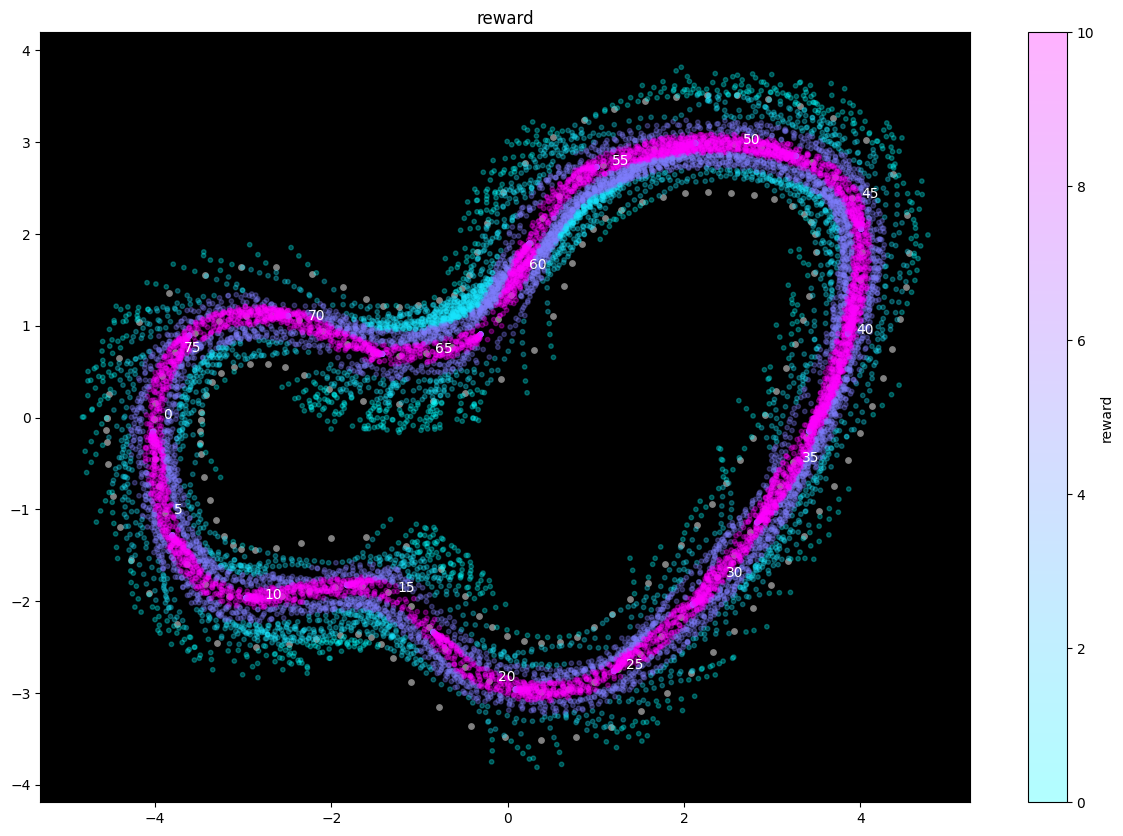

In [24]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 reward에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['reward'], s = 10, alpha = 0.3, cmap = plt.cm.cool)
plt.colorbar(label='reward')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('reward')
plt.gca().set_facecolor('black') # 배경색
plt.show()

### E4. 위험 구간

- 에피소드별 마지막 waypoint

In [25]:
df_last_waypoint = df_data[['episode', 'closest_waypoint']].copy()
df_last_waypoint = df_last_waypoint[::-1]
df_last_waypoint = df_last_waypoint.drop_duplicates(subset = 'episode')
df_last_waypoint = df_last_waypoint.rename({'closest_waypoint':'last_waypoint'}, axis = 1)
df_last_waypoint = df_last_waypoint.reset_index(drop = True)
df_last_waypoint

,episode,last_waypoint
0,219,15
1,218,2
2,217,59
3,216,8
4,215,73
...,...,...
215,4,23
216,3,17
217,2,16
218,1,12


- 마지막 waypoint 개수

In [26]:
df_dangerous = df_last_waypoint['last_waypoint'].value_counts()[::-1]
df_dangerous = df_dangerous.reset_index(name = 'count')
df_dangerous = df_dangerous.rename({'index':'waypoint'}, axis = 1)
df_dangerous

,waypoint,count
0,23,1
1,4,1
2,72,1
3,35,1
4,13,1
...,...,...
67,65,8
68,15,9
69,16,10
70,66,10


**[위험 구간 시각화]**

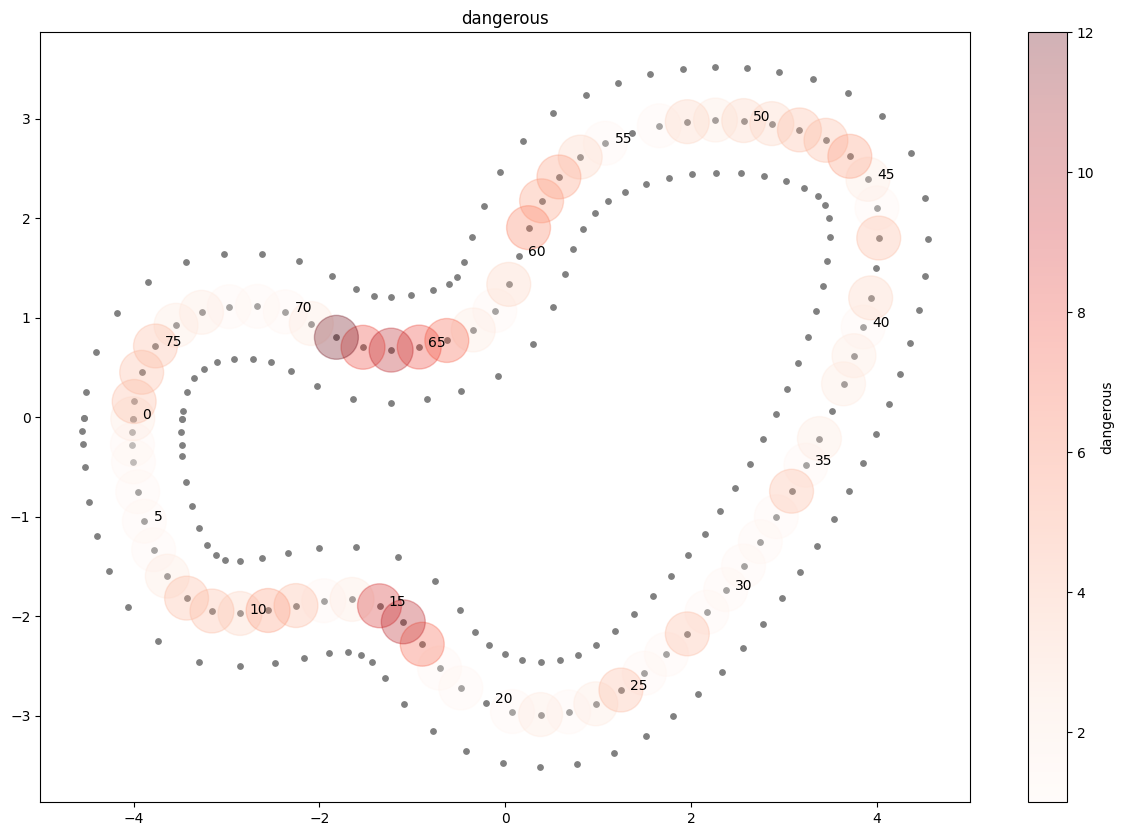

In [27]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 위험 (이탈) 구간 좌표 가져오기
x_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][0])
y_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][1])

# 위험 (이탈) 구간을 이탈한 정도에 따라 색깔을 다르게 시각화
plt.scatter(x = x_dan, y = y_dan,  c = df_dangerous['count'], s = 1000, alpha = 0.3, cmap = plt.cm.Reds)
plt.colorbar(label='dangerous')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title('dangerous')
plt.show()

#### E4-1. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

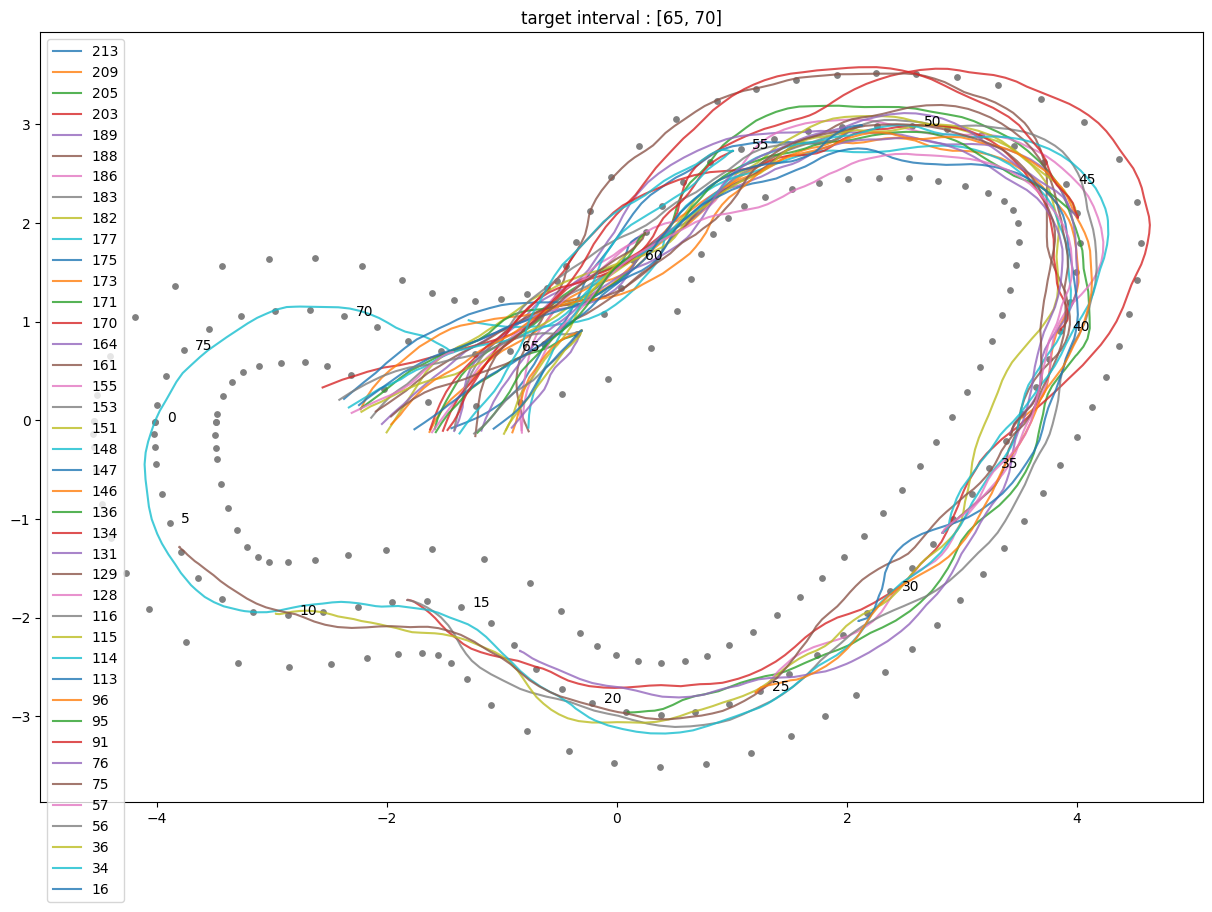

In [28]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [65, 70]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()